# Matematický software - zápočtová úloha

## Programová implementace SIR modelu

Model SIR s konstantní incidencí:

\begin{align*}
S' &= -\beta \frac{SI}{N}\\
I' &= \beta \frac{SI}{N} - \nu I\\
R' &= \nu I
\end{align*}
zároveň platí
\begin{align*}
R_0 = r = \frac{\beta}{v} = \frac{b}{v}
\end{align*}
Proto lze upravit do tvaru
\begin{align*}
R_0v = b
\end{align*}
Je potřeba zjistit ještě číslo $b$ - lze vyjádřit z rovnice výše, víme-li:
\begin{align*}
v = \frac{1}{D}
\end{align*},
kde $D$ je průměrná doba infekčního období.

Proto lze vyjádřit soustavu takto:
\begin{align*}
S' &= -\frac{rSI}{DN}\\
I' &= \frac{rSI}{DN} - \frac{I}{D}\\
R' &= \frac{I}{D}
\end{align*}

In [111]:
# Vykreslovací funkce
import matplotlib.pyplot as plt

def draw(t, sol, nemoc: str):
    plt.figure(figsize = (14, 4))

    plt.subplot(121)
    plt.plot(t, sol[0], "b", label="S(t)")
    plt.plot(t, sol[1], "g", label="I(t)")
    plt.plot(t, sol[2], "r", label="R(t)")
    plt.xlabel('Čas (dny)')
    plt.ylabel('Počet lidí')
    plt.legend(loc='best')
    plt.title(f'SIR model pro nemoc: {nemoc}')
    plt.grid()
    plt.show()

In [112]:
# Definice soustavy diferenciálních rovnic
from scipy.integrate import solve_ivp
import numpy as np

def system(t, a, N: int, D: int|float, r: int|float): #soustava diferenciálních rovnic
    S, I, R = a
    dSdt = (-1)*(r*S*I)/(D*N)
    dIdt = (r*S*I)/(D*N) - I/D
    dRdt = I/D
    return [dSdt, dIdt, dRdt]

In [113]:
# Definice funkce, která předpřipraví odpovědi na otázky zápočtové úlohy
def answers(solution, community: int, nemoc: str):
    print(f"\nNásledující výsledky se týkají epidemie v populaci o {community} obyvatelích pro nemoc {nemoc}:")

    #Zjištění vrcholu z křivky I(t)
    infected = list(solution.y[1])
    top = solution.t[infected.index(np.max(infected))]
    print(f"\nVrchol epidemie nastane {round(top)}. den s {round(np.max(infected))} nakaženými obyvateli.\n")

    #Zjištění konce epidemie
    for day, item in enumerate(infected):
        if item < 1:
            end = f"Epidemie skončí po {round(solution.t[day])} dnech."
            break
        else: end = f"NENÍ NASTAVENA DOSTATEČNÁ MEZ PRO ZJIŠTĚNÍ KONCE EPIDEMIE!"
    print(end)

    #Zjištění kolik jedinců nakonec onemocní a kolik ne
    S_val = solution.y[0]
    S_end = round(S_val[len(S_val) - 1])
    print(f"\nBěhem epidemie onemocnělo {round(community - S_end)} a neonemocnělo {S_end} obyvatel.")

### Chřipka

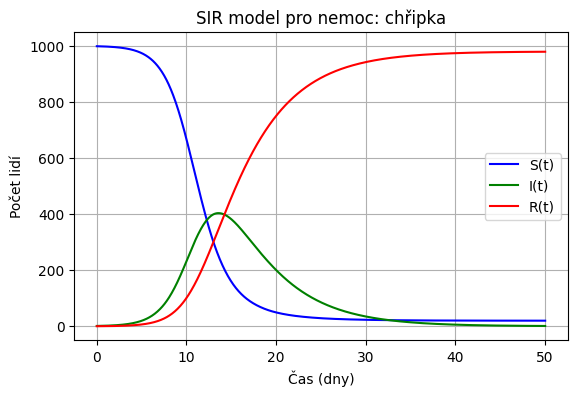


Následující výsledky se týkají epidemie v populaci o 1000 obyvatelích pro nemoc chřipka:

Vrchol epidemie nastane 14. den s 404 nakaženými obyvateli.

Epidemie skončí po 49 dnech.

Během epidemie onemocnělo 980 a neonemocnělo 20 obyvatel.


In [114]:
#chřipka
time_int = (0, 50) #časový interval (dny)
time_mark = np.linspace(0, 50, 1000) # vzorkování
community = 1_000 #velikost populace
initial_conditions = [community - 1, 1, 0] #počáteční podmínky

solution = solve_ivp(system, time_int, initial_conditions, t_eval = time_mark, args = (community, 5, 4))
draw(solution.t, solution.y, "chřipka")
answers(solution, community, "chřipka")

### Spalničky

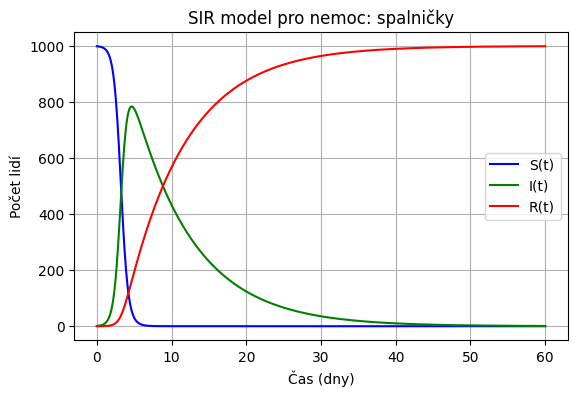


Následující výsledky se týkají epidemie v populaci o 1000 obyvatelích pro nemoc spalničky:

Vrchol epidemie nastane 5. den s 784 nakaženými obyvateli.

Epidemie skončí po 59 dnech.

Během epidemie onemocnělo 1000 a neonemocnělo 0 obyvatel.


In [115]:
#spalničky
time_int = (0, 60) #časový interval (dny)
time_mark = np.linspace(0, 60, 1000) # vzorkování
community = 1_000 #velikost populace
initial_conditions = [community - 1, 1, 0] #počáteční podmínky

solution = solve_ivp(system, time_int, initial_conditions, t_eval = time_mark, args = (community, 8, 18))
draw(solution.t, solution.y, "spalničky")
answers(solution, community, "spalničky")

### Černý kašel

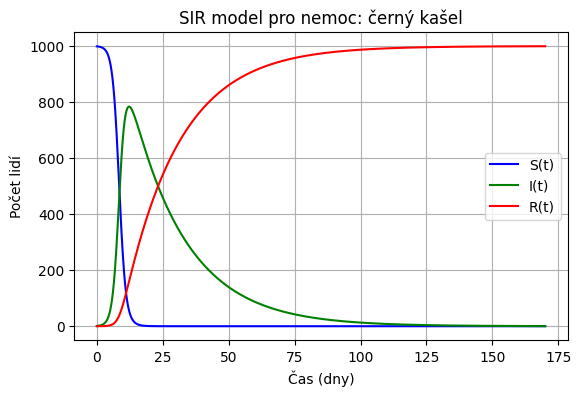


Následující výsledky se týkají epidemie v populaci o 1000 obyvatelích pro nemoc černý kašel:

Vrchol epidemie nastane 12. den s 784 nakaženými obyvateli.

Epidemie skončí po 154 dnech.

Během epidemie onemocnělo 1000 a neonemocnělo 0 obyvatel.


In [116]:
#černý kašel
time_int = (0, 170) #časový interval (dny)
time_mark = np.linspace(0, 170, 1000) # vzorkování
community = 1_000 #velikost populace
initial_conditions = [community - 1, 1, 0] #počáteční podmínky

solution = solve_ivp(system, time_int, initial_conditions, t_eval = time_mark, args = (community, 21, 18))
draw(solution.t, solution.y, "černý kašel")
answers(solution, community, "černý kašel")

### Tuberkulóza

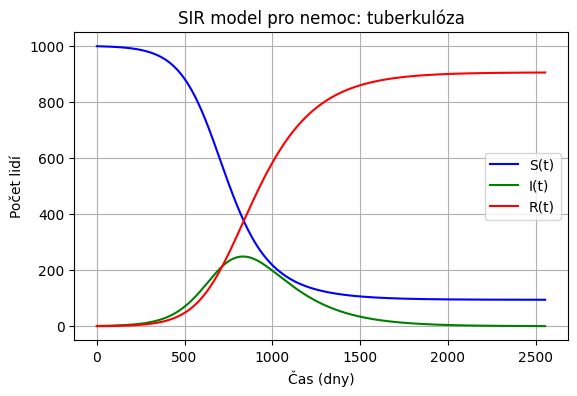


Následující výsledky se týkají epidemie v populaci o 1000 obyvatelích pro nemoc tuberkulóza:

Vrchol epidemie nastane 834. den s 249 nakaženými obyvateli.

Epidemie skončí po 2353 dnech.

Během epidemie onemocnělo 906 a neonemocnělo 94 obyvatel.


In [117]:
#tuberkulóza
time_int = (0, 2555) #časový interval (dny ~ 7 let)
time_mark = np.linspace(0, 2555, 1000) # vzorkování
community = 1_000 #velikost populace
initial_conditions = [community - 1, 1, 0] #počáteční podmínky

solution = solve_ivp(system, time_int, initial_conditions, t_eval = time_mark, args = (community, 180, 2.6))
draw(solution.t, solution.y, "tuberkulóza")
answers(solution, community, "tuberkulóza")

### Malárie

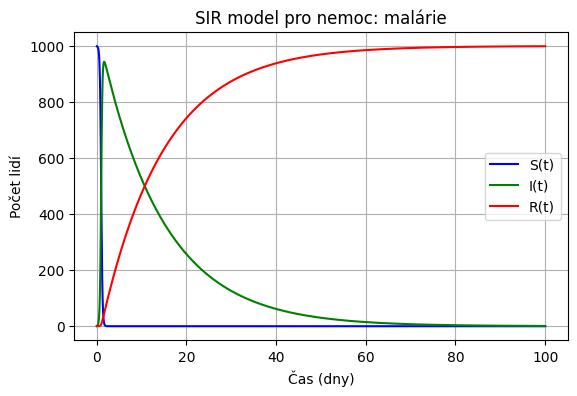


Následující výsledky se týkají epidemie v populaci o 1000 obyvatelích pro nemoc malárie:

Vrchol epidemie nastane 2. den s 944 nakaženými obyvateli.

Epidemie skončí po 98 dnech.

Během epidemie onemocnělo 1000 a neonemocnělo 0 obyvatel.


In [118]:
#malárie
time_int = (0, 100) #časový interval (dny)
time_mark = np.linspace(0, 100, 1000) # vzorkování
community = 1_000 #velikost populace
initial_conditions = [community - 1, 1, 0] #počáteční podmínky

solution = solve_ivp(system, time_int, initial_conditions, t_eval = time_mark, args = (community, 14, 100))
draw(solution.t, solution.y, "malárie")
answers(solution, community, "malárie")

## Úprava ekologického modelu Lotka-Volterra

Model Lotka-Volterra pro predátora a kořist:
\begin{align*}
\frac{dx}{dt} &= \alpha x - \beta xy = ax - bxy\\
\frac{dy}{dt} &= -\gamma y + \delta xy = -cy + dxy
\end{align*}

- x je populace kořisti
- y je populace predátora
- a - míra růstu kořisti
- b - koeficient interakce predátorů s kořistí, měří vliv na úmrtnost kořisti
- c - míra úmrtnosti predátora
- d - koeficient interakce predátorů a kořistí, měří vliv na růst predátora

### Model králík-liška

In [119]:
# Vykreslovací funkce
import matplotlib.pyplot as plt

def drawLV(t, sol):
    plt.figure(figsize = (14, 4))

    plt.subplot(121)
    plt.plot(t, sol[0], "g", label="králíci")
    plt.plot(t, sol[1], "r", label="lišky")
    plt.xlabel('Čas (dny)')
    plt.ylabel('Počet')
    plt.legend(loc='best')
    plt.title(f'Model Lotka-Volterra')
    plt.grid()
    plt.show()

In [120]:
# Definice soustavy diferenciálních rovnic
from scipy.integrate import solve_ivp
import numpy as np

def systemLV(t, z, a: float, b: float, c: float, d: float): #soustava diferenciálních rovnic
    x, y = z
    dxdt = a*x - b*x*y
    dydt = -c*y + d*x*y
    return [dxdt, dydt]

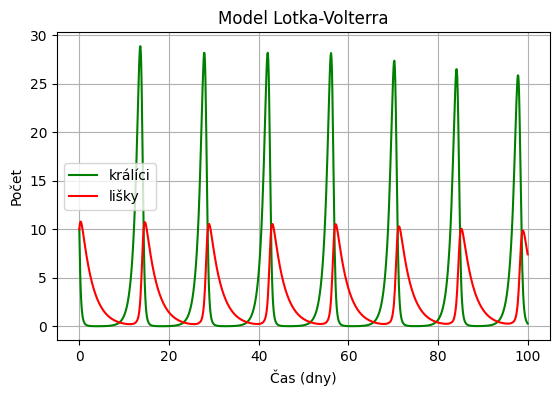

In [121]:
t_int = (0, 100) #časový interval
t_mark = np.linspace(0, 100, 1_000) #vzorkování
initial_cond = [10, 10]
a = 1.1
b = 0.4
c = 0.4
d = 0.1

solution = solve_ivp(systemLV, t_int, initial_cond, t_eval = t_mark, args = (a, b, c, d))
drawLV(solution.t, solution.y)


Modelová situace s 10 králíky a 10 liškami. Pokud dostatečně klesne počet lišek, rychle narůstá počet králíků, vzápětí ale opět roste i počet lišek. Takto by se jev opakoval cyklicky.

### Model králík-liška-rys

Model Lotka-Volterra králík-liška-rys:
\begin{align*}
\frac{dx}{dt} &= ax - bxy - cxz\\
\frac{dy}{dt} &= -dy + exy - fyz\\
\frac{dz}{dt} &= -gz + hxz + iyz
\end{align*}

- x značí populaci králíků - narůstá, redukuje ji liška (y) a vlk (z)
- y značí populaci lišek - klesá, zvyšuje ji konzumace králíků (x), redukuje ji rys (z)
- z značí populaci rysů - klesá, zvyšuje ji konzumace králíků (x) a lišek (y)
- koeficienty $a,b,c,d,e,f,g,h,i$ značí koeficienty růstu nebo poklesu

In [122]:
# Vykreslovací funkce
import matplotlib.pyplot as plt

def drawKLR(t, sol):
    plt.figure(figsize = (14, 4))

    plt.subplot(121)
    plt.plot(t, sol[0], "g", label="králík")
    plt.plot(t, sol[1], "b", label="liška")
    plt.plot(t, sol[2], "r", label="rys")
    plt.xlabel('Čas (dny)')
    plt.ylabel('Počet')
    plt.legend(loc='best')
    plt.title(f'Model Lotka-Volterra králík-liška-rys')
    plt.grid()
    plt.show()

In [123]:
# Definice soustavy diferenciálních rovnic pro model králík-liška-rys
from scipy.integrate import solve_ivp
import numpy as np

def systemKLR(t, p, a:float, b:float, c:float, d:float, e:float, f:float, g:float, h:float, i:float): #soustava diferenciálních rovnic
    x, y, z = p
    dxdt = a*x - b*x*y - c*x*z
    dydt = -d*y + e*x*y - f*y*z
    dzdt = -g*z + h*y*z + i*x*z
    return [dxdt, dydt, dzdt]

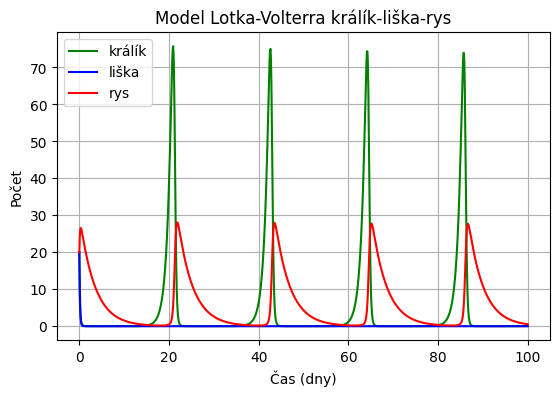

In [124]:
initial_cond = [20, 20, 20]
t_int = (0, 100)
t_mark = np.linspace(0, 100, 1_000)
a = 1.1  #rychlé množení králíků
b = 0.4  #častý lov králíků liškami
c = 0.2  #rys loví králíky málo
d = 0.4  #lišky bez potravy umírají rychle
e = 0.1  #králíci zvyšují růst populace lišek
f = 0.3  #rys redukuje lišky efektivně
g = 0.3  #rys má střední úmrtnost bez potravy
h = 0.1  #lišky jsou relativně dobrou potravou
i = 0.05 # králík není tak efektivní potrava

solution = solve_ivp(systemKLR, t_int, initial_cond, t_eval = t_mark, args = (a,b,c,d,e,f,g,h,i))
drawKLR(solution.t, solution.y)

Na tomto modelu je evidentní, že pokud budeme mít 20 králíků, 20 lišek a 20 rysů, lišky velice rychle všechny zahynou. Nadále pak budou vzájemně bilancovat pouze populace rysů a králíků. Bude to z toho důvodu, že je jednak rys predátorem lišek a zároveň liškám žere potravu.

## Implementace a úprava modelu Zombie Apokalypsy

Soustava diferenciálních rovnic popisujících průběh apokalypsy:
\begin{align*}
\frac{dS}{dt} &= p - bSZ - dS\\
\frac{dZ}{dt} &= bSZ + gR - aSZ\\
\frac{dR}{dt} &= dS + aSZ - gR
\end{align*}

- $S$ - počet nakažitelných
- $Z$ - počet zombies
- $R$ - počet zabitých
- $p$ - počet narozených za den
- $d$ - pravděpodobnost přirozené smrti
- $b$ - koeficient přenosu "zombie nemoci" (živý → zombie)
- $g$ - procentor denního "vzkříšení" (mrtvý → zombie)
- $a$ - koeficient zničení zombie

In [125]:
# Vykreslovací funkce
import matplotlib.pyplot as plt

def drawZA(t, sol, description:str = ""):
    plt.figure(figsize = (14, 4))

    plt.subplot(121)
    plt.plot(t, sol[0], "b", label="Živí")
    plt.plot(t, sol[1], "g", label="Zombie")
    plt.plot(t, sol[2], "r", label="Mrtví")
    plt.xlabel('Čas (dny)')
    plt.ylabel('Počet')
    plt.legend(loc='best')
    Title = "Zombie apokalypsa"
    plt.title(f"{Title} - {description}" if description else Title)
    plt.grid()
    plt.show()

In [126]:
# Definice soustavy diferenciálních rovnic zombie apokalypsy
from scipy.integrate import solve_ivp
import numpy as np

def systemZA(t, z, p:float, d:float, b:float, g:float, a:float): #diferenciální rovnice
    S, Z, R = z
    dSdt = p - b*S*Z - d*S
    dZdt = b*S*Z + g*R - a*S*Z
    dRdt = d*S + a*S*Z - g*R
    return [dSdt, dZdt, dRdt]

Model apokalypsy:
- 2 narození denně
- 0,01 % populace denně zemře
- koeficient nakažlivosti je 0,0005
- 0,01 % populace je denně "vzkříšeno" jako zombie
- koeficient zničení zombie živými je 0,0001

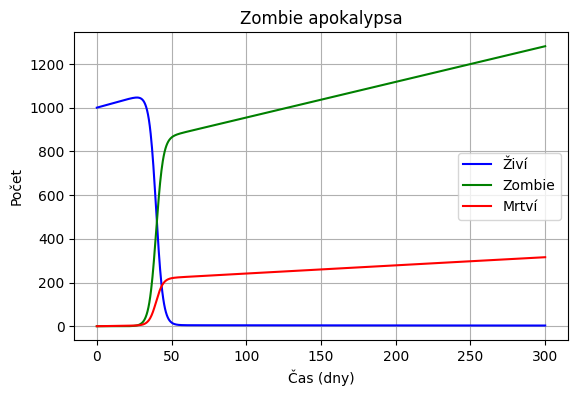

In [127]:
t_int = (0, 300) #časový interval
t_mark = np.linspace(0, 300, 1_000) #vzorkování
initial_cond = [1_000, 0, 0] #1000 živých, 0 zombie a mrtvých
p = 2 # narození za den
d = 0.0001 # přirozená smrt
b = 0.0005 # přenos zombie nemoci
g = 0.0001 # vzkříšení
a = 0.0001 # zničení zombie
arguments = (p,d,b,g,a)

solution = solve_ivp(systemZA, t_int, initial_cond, t_eval = t_mark, args = arguments)
drawZA(solution.t, solution.y)


S větším denním přírůstkem populace zombie přibývají rychleji - mají více potravy.

S větší úmrtností se výrazně zvyšuje pouze počet mrtvých - přeměna na zombie závisí na koeficientu vzkříšení, bez jeho zvýšení dojde k pomalejšímu růstu populace zombie, protože budou bez potravy.

I s malým nárůstem koeficientu nakažlivosti se populace zombie začne rozrůstat mnohem rychleji. Živí jsou rychle na pokraji "vyhynutí".

Zvyšování koeficientu vzkříšení povede ke zvýšení populace zombie, nemá přílišný vliv na populaci živých.

Malé zvýšení koeficientu zničení zombie vede k rychlému vyhlazení zombie populace (při zachování stejné nakažlivosti).

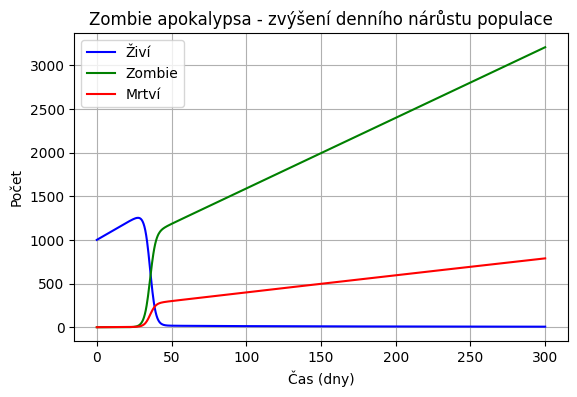

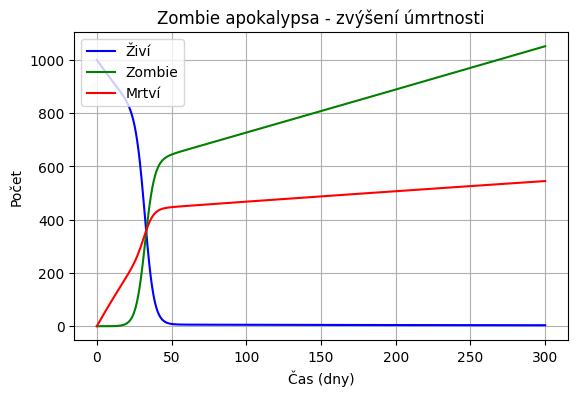

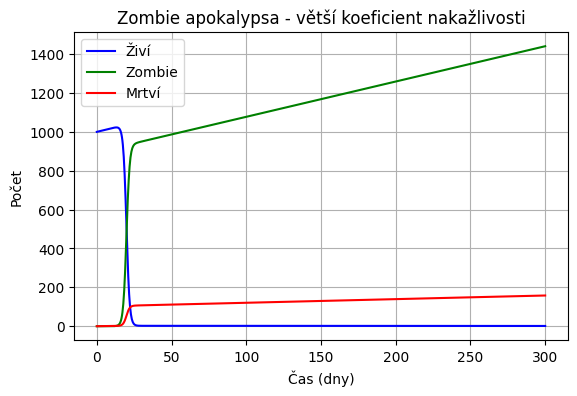

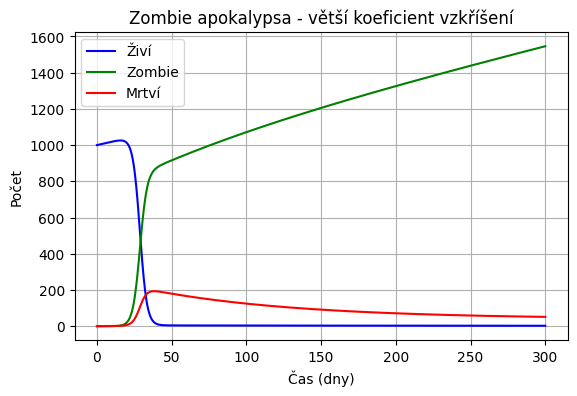

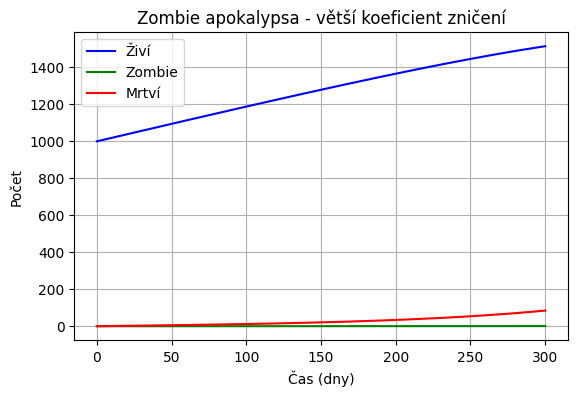

In [128]:
arguments1 = (10,d,b,g,a)
solution1 = solve_ivp(systemZA, t_int, initial_cond, t_eval = t_mark, args = arguments1)
drawZA(solution1.t, solution1.y, "zvýšení denního nárůstu populace")

arguments2 = (p,0.01,b,g,a)
solution2 = solve_ivp(systemZA, t_int, initial_cond, t_eval = t_mark, args = arguments2)
drawZA(solution2.t, solution2.y, "zvýšení úmrtnosti")

arguments3 = (p,d,0.001,g,a)
solution3 = solve_ivp(systemZA, t_int, initial_cond, t_eval = t_mark, args = arguments3)
drawZA(solution3.t, solution3.y, "větší koeficient nakažlivosti")

arguments4 = (p,d,b,0.01,a)
solution4 = solve_ivp(systemZA, t_int, initial_cond, t_eval = t_mark, args = arguments4)
drawZA(solution4.t, solution4.y, "větší koeficient vzkříšení")

arguments5 = (p,d,b,g,0.0005)
solution5 = solve_ivp(systemZA, t_int, initial_cond, t_eval = t_mark, args = arguments5)
drawZA(solution5.t, solution5.y, "větší koeficient zničení")

### Výzkumné otázky

1) Při změně kterých parametrů bude zombie apokalypsa zastavena, co se stane s populací živých?
- Vyšší úmrtnost: pokud by se prudce zvýšila úmrtnost, zombie apokalypsa by se velmi zpomalila až zastavila, ale populace živých by kvůli tomu vymizela
- Menší nakažlivost: bude apokalypsa rychle u konce, protože se nebude šířit dostatečně rychle
- Vyšší zničení: pokud bude dostatečně zvýšena možnost likvidace zombies, pak může populace živých překonat apokalypsu a úbytek bude způsoben pouze přirozenými faktory
- Ostatní parametry nezvládnou samy o sobě apokalypsu zastavit.

2) Jak se bude apokalypsa vyvíjet, pokud se budou se stejným koeficientem zvyšovat koeficienty nakažlivosti a ničení?

Výsledné populace se nezmění v závislosti na koeficientu $k$, ale zvyšuje se dynamika apokalypsy - dochází dříve k "vyhynutí" populace živých a nadvládě zombie. (viz níže)

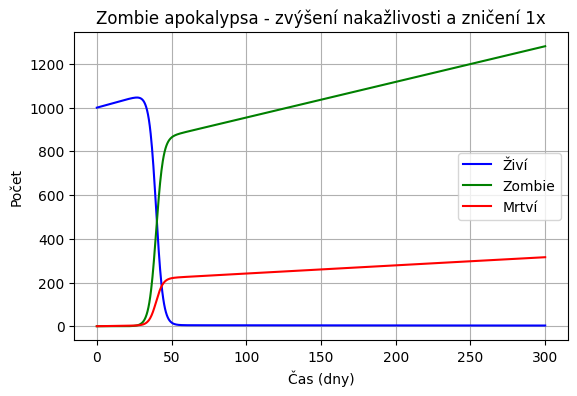

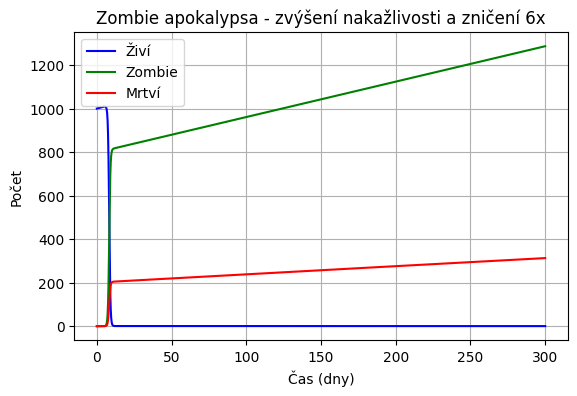

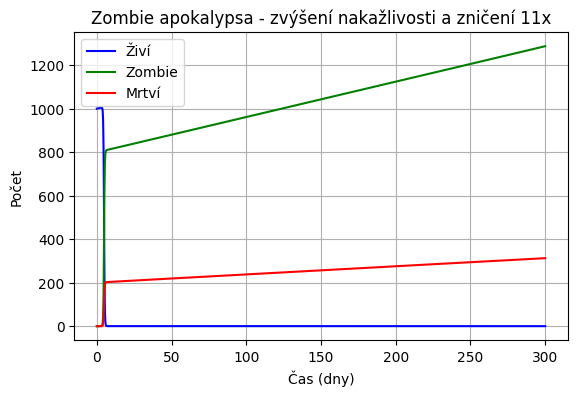

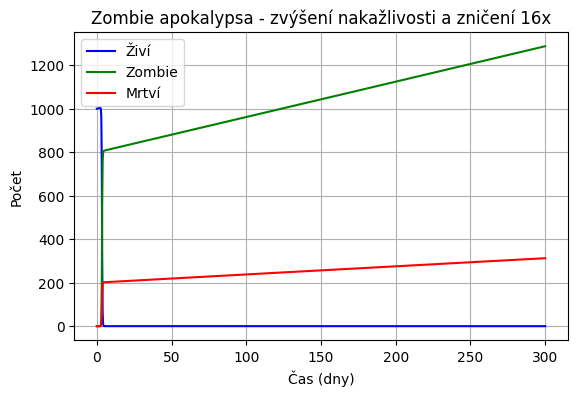

In [129]:
for k in range(1, 20, 5):
    argumentsU = (p,d,k*b,g,k*a)
    solutionU = solve_ivp(systemZA, t_int, initial_cond, t_eval = t_mark, args = argumentsU)
    drawZA(solutionU.t, solutionU.y, f"zvýšení nakažlivosti a zničení {k}x")

3) Co by se stalo, kdyby byl objeven lék, který by zombie vyléčil a vrátil je zpět mezi živé?

Uvažujme lék, který bude upravovat vztahy mezi populacemi živých a zombie. Bude dán koeficientem $c$. Následně bude soustava diferenciálních rovnic popisujících zombie apokalypsu vypadat následovně:

\begin{align*}
\frac{dS}{dt} &= p - bSZ - dS + cZ\\
\frac{dZ}{dt} &= bSZ + gR - aSZ - cZ\\
\frac{dR}{dt} &= dS + aSZ - gR
\end{align*}

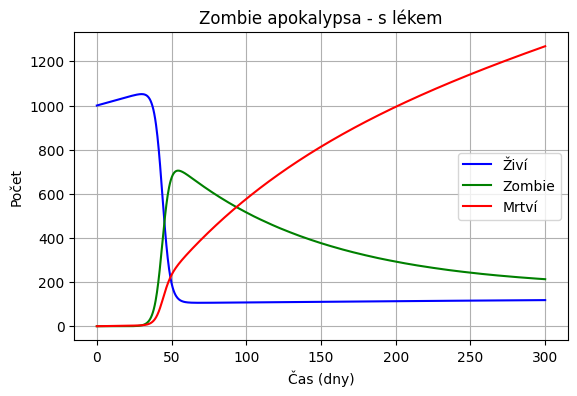

In [130]:
# Soustava diferenciálních rovnic pro variantu s lékem:

def systemZA_cure(t, z, p:float, d:float, b:float, g:float, a:float, c:float): #diferenciální rovnice
    S, Z, R = z
    dSdt = p - b*S*Z - d*S + c*Z
    dZdt = b*S*Z + g*R - a*S*Z - c*Z
    dRdt = d*S + a*S*Z - g*R
    return [dSdt, dZdt, dRdt]

t_int = (0, 300) #časový interval
t_mark = np.linspace(0, 300, 1_000) #vzorkování
initial_cond = [1_000, 0, 0] #1000 živých, 0 zombie a mrtvých
p = 2 # narození za den
d = 0.0001 # přirozená smrt
b = 0.0005 # přenos zombie nemoci
g = 0.0001 # vzkříšení
a = 0.0001 # zničení zombie
c = 0.05 # lék
arguments = (p,d,b,g,a,c)

solution = solve_ivp(systemZA_cure, t_int, initial_cond, t_eval = t_mark, args = arguments)
drawZA(solution.t, solution.y, "s lékem")


Bude-li lék dostatečně účinný, může vést ke zpomalení, dokonce i postupnému zastavení, apokalypsy. Na grafu výše lék vyléčí 5 % populace za den.